# Social Minimal Interaction

Some authors have pointed out the need of designing metrics capturing the ‘ability for interaction’ that subjects have as a constituent element of sensorimotor and social cognition. In these cases, dynamical processes with emergent collective properties are generated, overflowing the individual abilities of each interlocutor.

During the last years, a classical experiment has been taken as inspiration for building a minimal framework known as the ‘perceptual crossing paradigm’, which has allowed a series of studies on social interactions which focus on the dynamical process of interactions as a constituent element of the emergence of the whole social system.

Previous analysis have been constrained to short-term dynamic responses of the player. In turn, we propose a complex systems approach based on the analysis of long-range correlations and fractal dynamics as a more suitable framework for the analysis of complex social interactions that are deployed along many scales of activity.

# 1. The perceptual crossing paradigm

There exist social processes that emerge in collective online situations –when two persons are engaged in real-time interactions– that can not be captured by a traditional offline perspective, understanding the problem in terms of an isolated individual that acts as observer exploiting its internal cognitive mechanisms to understand people.

From an experimental point of view, a minimal paradigm has been consolidated along the recent years. Perceptual crossing paradigm constitutes a simple framework for studying social online interactions, and for understanding the mechanisms that give support to social capabilities. The experiment involves two participants sitting in different rooms and interacting by moving a sensor along a shared virtual line using a computer mouse. In this experimental framework, several experiments can be designed providing us with a way to study online dyadic interaction and to analyze the perception of someone else’s agency in different situations implemented in minimal virtual worlds. Those experiments highlight that emergent coordination processes result in successful detection of agency although, on an individual level, participants can not discriminate it. Furthermore, all these results illustrate the importance of online dynamical interaction in the analysis of human social cognition.

# 2. Experimental framework

The device of the participants consisted of a computer-mouse that moved left and right searching someone to interact. The environment consisted of a virtual one-dimensional space of 800 pixels long with both ends connected, forming a torus to avoid the singularities induced by the edges. The participant shifted a cursor in this space moving her computer-mouse. 

In this blindfold experiment, human participants were placed in computers to interact in pairs, within a shared perceptual space, where some opponents were other human participants and some opponents were computerized agents (bots) but participants are unaware of the nature of their opponents. Concretely, participants could play against another human, an 'oscillatory agent', or a 'shadow agent'. The oscillatory agent moved according a sinusoidal function while the shadow agent replicated the movements of the player with a certain delay in time and in space.

When opponents (human-human or human-bot) cross their cursors, they receive an auditive stimulation. No image of the cursors or their positions were displayed on the computerscreen, so the auditive stimulations were the only environmental perceptions of the virtual space.

![](PercCross-Traces.png)


## 2.1. Exercise

The script below contains data from the experiment just related. We are going to analize the trace of the movement for each type of match (human-human, human-oscillatory, and human-shadow):

- Plot the graph of the trace of the participant.
- Obtain the main statistics of the trace: mean, variance.
- Are there any differences related to the type of opponent?



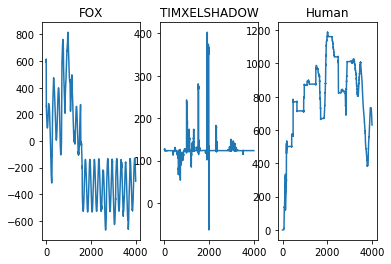

In [18]:
%matplotlib inline
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
from pyeeg import dfa as dfa

def readFilePerceptualCrossing(filename):
    data = scipy.io.loadmat(filename)
    size = len(data['dataSeries'])
    series  = [data['dataSeries'][i][0] for i in range(size)]
    series  = np.array(series)[:,:,0]
    series  = scipy.signal.decimate(series, 10, zero_phase=True)
    oppType = [data['dataOpponentType'][i][0] for i in range(size)]
    oppType = np.array(oppType)[:,0]
    return [series, oppType]


[series, oppType] = readFilePerceptualCrossing('dataPC-distance.mat')
ax = plt.subplot(1,3,1)
plt.title(oppType[0])
plt.plot(series[0,:])
ax = plt.subplot(1,3,2)
plt.title(oppType[1])
plt.plot(series[1,:])
ax = plt.subplot(1,3,3)
plt.title(oppType[2])
plt.plot(series[2,:])


36.36619309193636
363.66193091936367


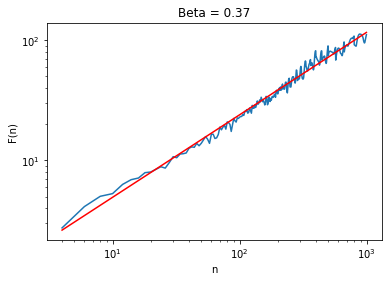

In [41]:
def plot_dfa_perceptual(x):
    #x = np.diff(series[i,:])
    n = range(4,1000,2)
    [_, n, F] = dfa(x, L=n)
    #print(str(i)+"\t"+oppType[i]+"\t"+str(beta))
    P = np.polyfit(np.log(n),np.log(F), 1)
    beta = 2*P[0]-1
    plt.title("Beta = {:0.2f}".format(beta))
    plt.xlabel('n')
    plt.ylabel('F(n)')
    plt.loglog(n, F)
    plt.loglog(n, np.power(n, P[0])*np.exp(P[1]), 'r')
    return [beta, n, F]

print(115*10**-0.5)
print(115*10**0.5)    
a = plot_dfa_perceptual(np.diff(series[2,:]))

# References
- Reference1. [Title](https://link)
- Auvray et al. (2009)

